In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, RobustScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from kneed import KneeLocator

**Ejercicios de algoritmos de Agrupación..**

* Limpieza e interpretación de los datos.
* Preprocesados y PCA.
* Encontrar número de clústeres óptimo.
* Creación de modelos. unsupervised (k-means y clustering jerárquico).
* Interpretar los resultados.

# Ejercicio 1
Descargue el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifique los diferentes registros utilizando el algoritmo de **K-means**.

##### Importante

Ten en cuenta que previamente necesitarás preparar el dataset.

## Modelo de agrupación (Clustering)

El clustering es el proceso global que implica encontrar grupos de datos similares que existen en su conjunto de datos, lo que puede ser extremadamente valioso si usted está tratando de encontrar su significado subyacente. La agrupación es una forma de algoritmo no supervisado. Esto significa que, a diferencia de la clasificación o la regresión, la agrupación no requiere datos etiquetados reales. Estos algoritmos son capaces de encontrar grupos que no están explícitamente etiquetados e identificar patrones subyacentes que puedan aparecer en el conjunto de datos. Uno de los algoritmos de agrupación más sencillos pero eficaces es el algoritmo **K-means**.

### k-means

El algoritmo para la agrupación k-means es bastante sencillo:

1. En primer lugar, elegiremos "k" centroides, donde "k" sería el número esperado de clusters distintos. El valor de k lo elegiremos nosotros y determinará el tipo de clustering que obtengamos.

2. A continuación, colocaremos los "k" centroides en lugares aleatorios entre los datos de entrenamiento existentes.

3. A continuación, se calculará la distancia de cada centroide a todos los puntos de los datos de entrenamiento. En breve entraremos en detalle sobre las funciones de distancia, pero por ahora, vamos a considerarla simplemente como la distancia a la que se encuentran unos puntos de otros.

4. Ahora, todos los puntos de entrenamiento se agruparán con su centroide más cercano.

5. Aislando los puntos de entrenamiento agrupados junto con sus respectivos centroides, calcule el punto de datos medio en el grupo y mueva el centroide anterior a la ubicación media.

6. Este proceso se repetirá hasta la convergencia o hasta que se haya alcanzado el límite máximo de iteración.

La matemática más importante que sustenta este algoritmo es la función de distancia. Una función de distancia es básicamente cualquier fórmula que le permite entender cuantitativamente cuán lejos está un objeto de otro, siendo la más popular la fórmula de distancia euclidiana:

$$
dist\_Euclidean(x,y)=\sum_{i=1}^{n}\sqrt{(x_{i}-y_{i})^2},\qquad x=(x_{1},x_{2},\cdots,x_{n}),\,\,y=(y{1},y_{2},\cdots,y_{n}).
$$

Otra métrica de distancia popular que puede utilizarse para la agrupación es la distancia Manhattan.

$$
dist\_Manhattan(x,y)=\sum_{i=1}^{n}|(x_{i}-y_{i}|,\qquad x=(x_{1},x_{2},\cdots,x_{n}),\,\,y=(y{1},y_{2},\cdots,y_{n}).
$$

# Solución

In [2]:
df=pd.read_csv('Publicacions Facebook Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


Estas publicaciones se extrajeron de las páginas de Facebook de 10 vendedores minoristas tailandeses de moda y cosméticos desde marzo de 2012 hasta junio de 2018. Para cada publicación de Facebook, el conjunto de datos registra las medidas de participación resultantes que comprenden comparticiones, comentarios y reacciones emoji dentro de las cuales distinguimos los "me gusta", "amor", "guau", "jaja", "triste" y "enfadado". Este conjunto de datos podría servir de base para la investigación sobre el compromiso de los clientes con el novedoso canal de ventas que es Facebook Live.

El prpósito del siguiente ejercicio es crear un modelo de agrupación.

|Variable|Descripción|
|--------|-----------|
|status_id | identificador único de la entrada|
|status_type | tipo de mensaje|
|status_published | fecha y hora de publicación de la entrada|
|num_reactions | número de likes, loves, wows, hahas, sads y angrys|
|num_comments | número de comentarios|
|num_shares | número de comparticiones|
|num_likes | número de me gusta|
|num_loves | número de amores|
|num_wows | número de guau|
|num_hahas | número de jajás|
|num_sads | número de tristes|
|num_angrys | número de enfados|

## 1.1 EDA

1. Verificar si existen valores nulos.

In [3]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

2. Observar los tipos de datos de cada columna.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

3. Observar regitros duplicado según su identificador.

In [3]:
df[df['status_id'].duplicated() == True].head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
1698,246675545449582_326883450762124,photo,10/11/2013 8:23,211,2,0,211,0,0,0,0,0,NaN,NaN,NaN,NaN
1729,246675545449582_429583263825475,photo,9/11/2013 0:12,537,16,1,537,0,0,0,0,0,NaN,NaN,NaN,NaN
6221,819700534875473_1002372733274918,video,6/10/2018 3:43,376,20,3,354,19,3,0,0,0,NaN,NaN,NaN,NaN
6222,819700534875473_1001982519980606,photo,6/9/2018 22:53,255,7,4,249,6,0,0,0,0,NaN,NaN,NaN,NaN
6223,819700534875473_1000607730118085,photo,6/7/2018 7:01,1704,21,3,1685,15,2,2,0,0,NaN,NaN,NaN,NaN


In [4]:
print(len(df[df['status_id'].duplicated() == True]))

53


De esto se deduce que alrededor de 53 observaciones de la columna **status_id** están duplicadas. Procederemos a eliminar los duplicados utilizando la columna **status_id**.

In [5]:
df.drop_duplicates(subset='status_id', keep='last',inplace=True)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


4. Vamos a prescindir de las 4 últimas columnas las cuales son nulas. Además, haremos lo mismo con **status_id** pues no aporta nada a nuestro estudio, y lo haremos de la siguiente manera:

In [6]:
df=df.iloc[:,1:12]
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


5. Convertir la variable **status_published** de tipo string a datetime.

In [7]:
df['status_published'] = pd.to_datetime(df['status_published'])
df['year'] = df['status_published'].dt.year
df['month'] = df['status_published'].dt.month
df['day'] = df['status_published'].dt.day
df['hour'] = df['status_published'].dt.hour

In [8]:
df.reset_index(inplace = True, drop = True)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3


6. Eliminar columna **status_published**.

In [9]:
df = df.drop('status_published', axis=1)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
0,video,529,512,262,432,92,3,1,1,0,2018,4,22,6
1,photo,150,0,0,150,0,0,0,0,0,2018,4,21,22
2,video,227,236,57,204,21,1,1,0,0,2018,4,21,6
3,photo,111,0,0,111,0,0,0,0,0,2018,4,21,2
4,photo,213,0,0,204,9,0,0,0,0,2018,4,18,3


7. Heatmap para mostrar la correlación entre las variables.

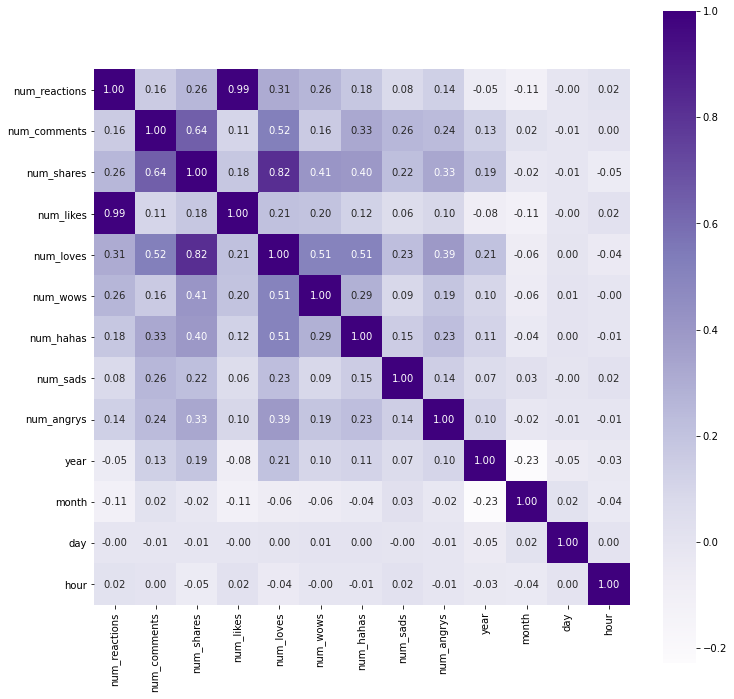

In [47]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Purples',annot_kws={'size':10},fmt='.2f',square=True);

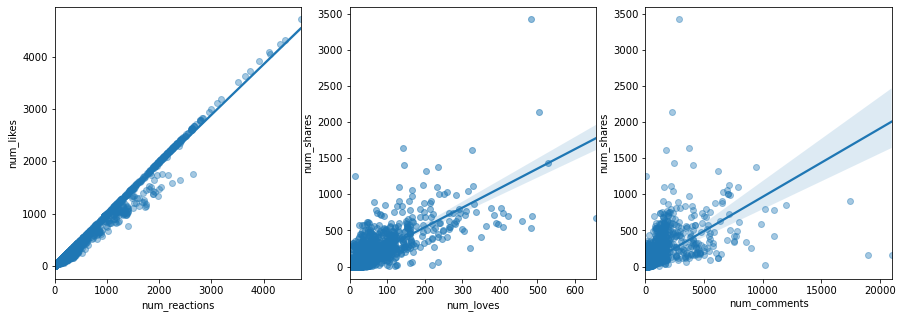

In [48]:
f=plt.figure(figsize=(15,5))
f1=f.add_subplot(1,3,1)
sns.regplot(x='num_reactions',y='num_likes',data=df,scatter_kws={'alpha': 0.4})
f2=f.add_subplot(1,3,2)
sns.regplot(x='num_loves',y='num_shares', data=df,scatter_kws={'alpha': 0.5});
f3=f.add_subplot(1,3,3)
sns.regplot(x='num_comments',y='num_shares', data=df,scatter_kws={'alpha': 0.4});

Del gráfico anterior se puede ver que las variables altamente correlacionadas son: **num_reactions**, **num_shares**, **num_likes** y **num_loves**. Por lo tanto, podemos escoger una variable y eliminar las otras de la siguiente manera:

In [10]:
df = df.drop(['num_reactions', 'num_loves','num_comments'], axis=1)
df.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
0,video,262,432,3,1,1,0,2018,4,22,6
1,photo,0,150,0,0,0,0,2018,4,21,22
2,video,57,204,1,1,0,0,2018,4,21,6
3,photo,0,111,0,0,0,0,2018,4,21,2
4,photo,0,204,0,0,0,0,2018,4,18,3


5. Mostrar descripción estadística de las variables.

In [11]:
df.describe().round(2)

,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
count,6997.00,6997.0,6997.00,6997.00,6997.00,6997.00,6997.00,6997.00,6997.00,6997.00
mean,40.27,209.9,1.25,0.70,0.23,0.11,2016.37,6.60,15.79,7.83
std,132.06,439.6,8.73,3.97,1.48,0.69,1.95,3.59,8.72,6.89
min,0.00,0.0,0.00,0.00,0.00,0.00,2012.00,1.00,1.00,0.00
25%,0.00,17.0,0.00,0.00,0.00,0.00,2016.00,3.00,8.00,2.00
50%,0.00,57.0,0.00,0.00,0.00,0.00,2017.00,6.00,16.00,7.00
75%,4.00,182.0,0.00,0.00,0.00,0.00,2018.00,10.00,23.00,9.00
max,3424.00,4710.0,278.00,157.00,51.00,31.00,2018.00,12.00,31.00,23.00


6. Codificar la variable **status_type** con la método **LabelEncoder()**

In [12]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Podemos ver que hay 4 categorías de etiquetas en la variable **status_type**. A continuación la transformaremos de la siguiente manera:

In [13]:
label_encoder=LabelEncoder()
df.status_type=label_encoder.fit_transform(df.status_type)
df.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
0,3,262,432,3,1,1,0,2018,4,22,6
1,1,0,150,0,0,0,0,2018,4,21,22
2,3,57,204,1,1,0,0,2018,4,21,6
3,1,0,111,0,0,0,0,2018,4,21,2
4,1,0,204,0,0,0,0,2018,4,18,3


7. Diagramas de cajas y bigotes para visualizar valores atípicos

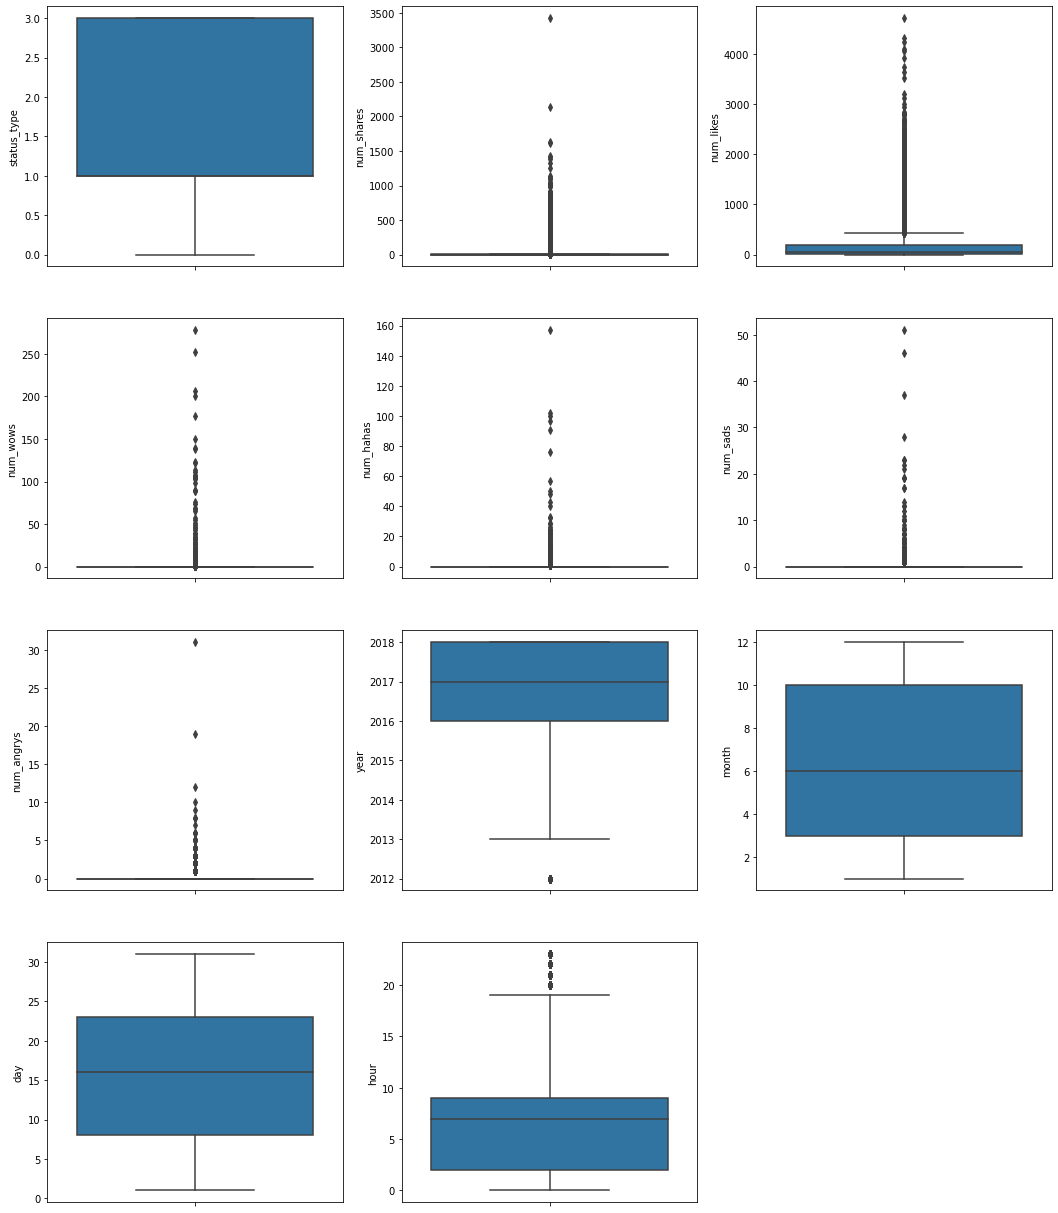

In [53]:
f=plt.figure(figsize=(18,22))
for i , col in zip(range(1,12),df.columns):
    fplot=f.add_subplot(4,3,i)
    sns.boxplot(y = col, data = df);

<p style='color:purple'>Se puede ver en la figura que la mayoría de la columnas tiene valore atípicos. Por tal motivo, más adelate se van transformar nuestros datos con <strong>RobustScaler</strong>.</p>

## 1.2. Aplicar el algoritmo de agrupación **K-Means**.

1. Agrupamos los puntos con **k-means** usando  $k=3$.

In [54]:
n = 3
kmeans = KMeans(n_clusters= n, init='k-means++',random_state= 42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

2. El resultado son tres centroides en torno a los cuales se agrupan los puntos y las etiquetas para cada punto que indican a qué cluster pertenece dicho punto.

In [55]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

3. Dibujamos ahora los puntos y los centroides, utilizando un color distinto para los puntos de cada cluster.

In [56]:
label = kmeans.fit_predict(df)
df_test = df.copy()
df_test['label'] = label
df_test['label'] = df_test['label'].astype(str)
df_test.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,label
0,3,262,432,3,1,1,0,2018,4,22,6,0
1,1,0,150,0,0,0,0,2018,4,21,22,0
2,3,57,204,1,1,0,0,2018,4,21,6,0
3,1,0,111,0,0,0,0,2018,4,21,2,0
4,1,0,204,0,0,0,0,2018,4,18,3,0


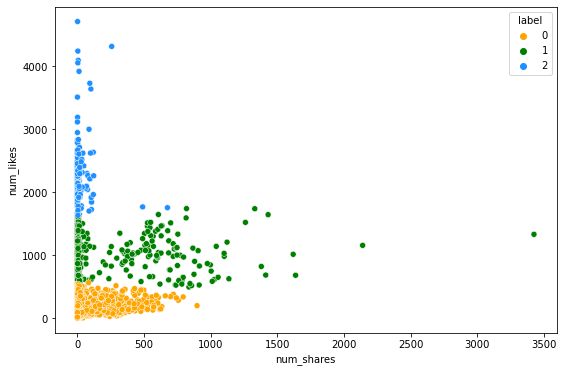

In [57]:
plt.figure(figsize= (9,6))
sns.scatterplot(data = df_test, x='num_shares', y='num_likes', hue = 'label',
                palette=['orange','green','dodgerblue']);

## 1.3 Elección del número óptimo de clusters en Kmeans

1. Encontrar el número óptimo de K clusters utilizando la técnica del codo(**elbow**).

In [58]:
K=range(1,10)
distance_values = []
for cluster in K:
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    distance_values.append(kmeans.inertia_)

df_output = pd.DataFrame({'Cluster':range(1,10), 'distance_values':distance_values})    
df_output

,Cluster,distance_values
0,1,1.475604e+09
1,2,4.417378e+08
2,3,2.757222e+08
3,4,2.042607e+08
4,5,1.642946e+08
5,6,1.321555e+08
6,7,1.027157e+08
7,8,8.610737e+07
8,9,7.550102e+07


2. Visualizar los valores $K$.

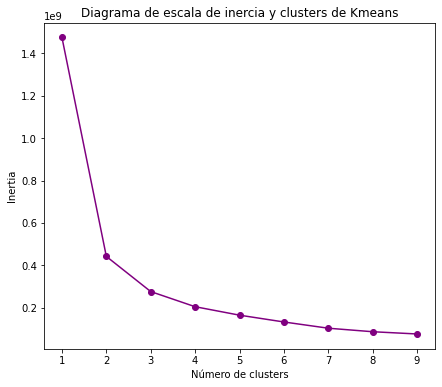

In [59]:
plt.figure(figsize=(7,6))
plt.plot(df_output['Cluster'], df_output['distance_values'], marker='o',color='purple')
plt.title('Diagrama de escala de inercia y clusters de Kmeans')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()

El gráfico anterior muestra un comportamiento común. Cuando el número de agrupaciones es muy pequeño, la densidad es proporcionalmente baja, por lo que la cohesión es baja y, en consecuencia, la inercia es alta. Aumentar el número de agrupaciones obliga al modelo a crear grupos más cohesionados y la inercia empieza a disminuir bruscamente. La regla  consiste en elegir el número de agrupaciones correspondiente al punto que separa la región de alta variación de la región casi plana. De este modo, estamos seguros de que todos los agrupamientos han alcanzado su cohesión máxima. Para nuestro ejemplo, **K=2** es el mejor candidato.

3. Encontrar el elbow usando la libreria **kneed locator**.

Si es difícil decidir qué parte del gráfico es un codo. Al usar el localizador del codo podemos encontrar este $k$. 

In [60]:
klocator = KneeLocator(range(1, 10), distance_values, curve="convex", direction="decreasing")
print(f'k={klocator.elbow}')

k=2


Por lo tanto, el número de grupos que usaremos para construir el modelo de K-means es de dos.

# Ejercicio 2
Clasifique los diferentes registros utilizando el algoritmo de clustering jerárquico.

## 2.1  Clustering jerárquico

Es importante tener en cuenta que la distancia euclídea es una de las métricas de distancia más populares, no la única. A través de estas métricas de distancia, ampliaremos los cálculos de vecinos comunes introduciendo el concepto de jerarquía. Al utilizar la jerarquía para transmitir la información de agrupación, podemos crear agrupaciones más sólidas que tengan más sentido lógico. Al igual que k-means, la agrupación jerárquica puede ser útil para casos como la segmentación de clientes o la identificación de tipos de productos similares. Sin embargo, hay una pequeña ventaja en poder explicar las cosas de una manera más clara con la agrupación jerárquica.

Este algoritmo tiene el mismo uso que la agrupación K-Means, pero el enfoque es diferente. Comenzamos determinando los dos puntos más cercanos y los agrupamos como uno. A continuación, procedemos a encontrar el siguiente conjunto de dos grupos más cercanos y los agrupamos como uno. Repetimos esta operación hasta obtener el número deseado de grupos.

# Solución

### Dendograma.

Un enfoque alternativo a la agrupación en clusters consiste en "hacer crecer" los clusters de abajo arriba. Es decir, en forma de árbol que nos permite representar toda la jerarquía de agrupación producida por un algoritmo aglomerativo o divisivo.  La idea consiste en colocar las muestras en el eje $x$ y el nivel de disimilitud en el eje $y$.

Podemos hacerlo de la siguiente manera

1. Hacer de cada entrada su propio cluster de uno.

2. Mientras existan varios clusters, encuentre los dos clusters más cercanos y fúndalos.

Al final, tendremos un cluster gigante que contiene todas las entradas (ver gráfico). 

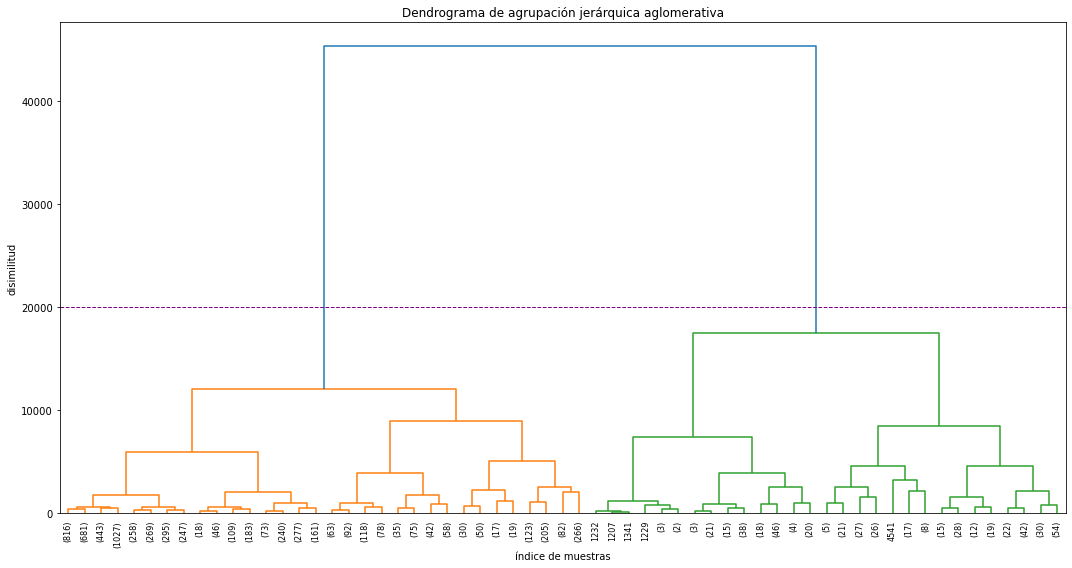

In [61]:
Z = linkage(df, 'ward')
c, coph_dists = cophenet(Z, pdist(df))
plt.figure(figsize=(15, 8))
plt.title('Dendrograma de agrupación jerárquica aglomerativa')
plt.xlabel('índice de muestras')
plt.ylabel('disimilitud')
dendrogram(Z,leaf_rotation=90,leaf_font_size=8,truncate_mode="level", p=5)
plt.axhline(y=20000, c='purple', lw=1, linestyle='dashed')
plt.tight_layout()

En el gráfico anterior podemos observar que existen dos clusters bien definidos si trazamos una línea horizontal de color **púrpura**  en $y=$20000.

### Agrupación Agglomerative

In [21]:
# Hacer una copia del dataframe
df_agglo=df.copy()
# escalador robust del dataframe
scaler=RobustScaler() 
df_agglo[df_agglo.columns]=scaler.fit_transform(df_agglo)
# Aplicar el modelo
model_agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
label_agglo = model_agglo.fit(df_agglo)
# Crear nueva columna con las etiquetas de los diferentes Clusters
df_agglo['predict'] =  label_agglo.labels_
df_agglo['predict']=df_agglo['predict'].astype(str)
df_agglo_concat=pd.concat([df,df_agglo['predict']],axis=1)
df_agglo_concat.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,predict
0,3,262,432,3,1,1,0,2018,4,22,6,0
1,1,0,150,0,0,0,0,2018,4,21,22,1
2,3,57,204,1,1,0,0,2018,4,21,6,1
3,1,0,111,0,0,0,0,2018,4,21,2,1
4,1,0,204,0,0,0,0,2018,4,18,3,1


1. Gráficar los clusters

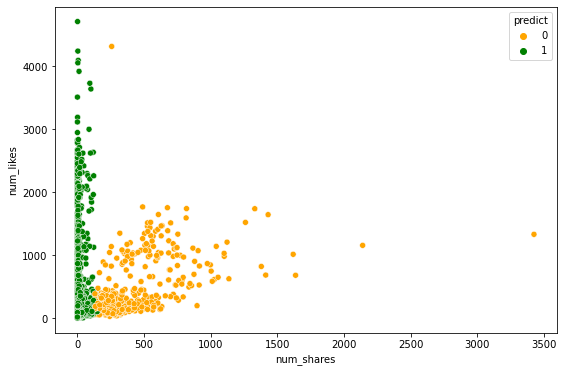

In [22]:
plt.figure(figsize= (9,6))
sns.scatterplot(data = df_agglo_concat, x='num_shares', y='num_likes', hue = 'predict',
                palette=['orange','green']);


2. Puntuación para la agrupación Agglomerative

In [20]:
score_agglomerative=silhouette_score(df_agglo, label_agglo.labels_, metric='euclidean')
np.round(score_agglomerative,4)

0.8491

<a name='ref_1' style='text-decoration:none; color:purple'>La puntuación es de 0.8491.<a/>

# Ejercicio 3
Calcule el rendimiento del clustering intermediando un parámetro como puede ser silhouette.

## 3.1 Rendimiento de la agrupación - Puntuación Silhouette

Comprender el rendimiento de los métodos de aprendizaje no supervisado es mucho más difícil que el de los métodos de aprendizaje supervisado, ya que no se dispone de la verdad sobre el terreno. En el caso del aprendizaje supervisado, existen muchas métricas de rendimiento sólidas, de las cuales la más sencilla es la precisión, que consiste en comparar las etiquetas predichas por el modelo con las etiquetas reales y ver cuántas ha acertado el modelo. Desgraciadamente, en el caso de la agrupación, no disponemos de etiquetas en las que basarnos y necesitamos comprender lo "diferentes" que son nuestras agrupaciones. Esto se consigue con la métrica de puntuación de siluetas (Silhouette). También podemos utilizar las puntuaciones de silueta para encontrar el número "K" óptimo de agrupaciones(clusters) para nuestros métodos de aprendizaje no supervisado.

La puntuación del coeficiente de silueta calcula la distancia media entre cada punto y todos los demás puntos de su conglomerado (a), así como la distancia media entre cada punto y todos los demás puntos de su conglomerado más cercano (b). Los relaciona de acuerdo con la siguiente ecuación:

$$
s = \frac{b - a}{ \max(a,b)}.
$$

La métrica de la silueta funciona analizando lo bien que encaja un punto en su conglomerado. La métrica oscila entre -1 y 1. Si la puntuación media de la silueta a lo largo de su agrupación es uno, entonces habrá logrado agrupaciones perfectas y habrá una confusión mínima sobre qué punto pertenece a cada lugar. Sin embargo, esto es muy raro; la puntuación de la silueta debe tratarse como un intento de hacerlo lo mejor posible, ya que acertar es muy poco probable. Si la puntuación de la silueta es positiva, significa que un punto está más cerca del conglomerado asignado que de los conglomerados vecinos. Si la puntuación de la silueta es 0, entonces un punto se encuentra en el límite entre el conglomerado asignado y el siguiente conglomerado más cercano. Si la puntuación de la silueta es negativa, indica que un punto determinado se ha asignado a un conglomerado incorrecto y que, de hecho, es probable que pertenezca a un conglomerado vecino.

# Solución

In [37]:
X=df
score = []
for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(X, labels, metric='euclidean'))

In [24]:
print(f'score_kmeans = {np.round(score,4)}')
print(f'puntuación media: {np.mean(score)}')

score_kmeans = [0.8545 0.8088 0.6297 0.6306 0.6769 0.6785 0.6411 0.6363]
puntuación media: 0.6945473938946258


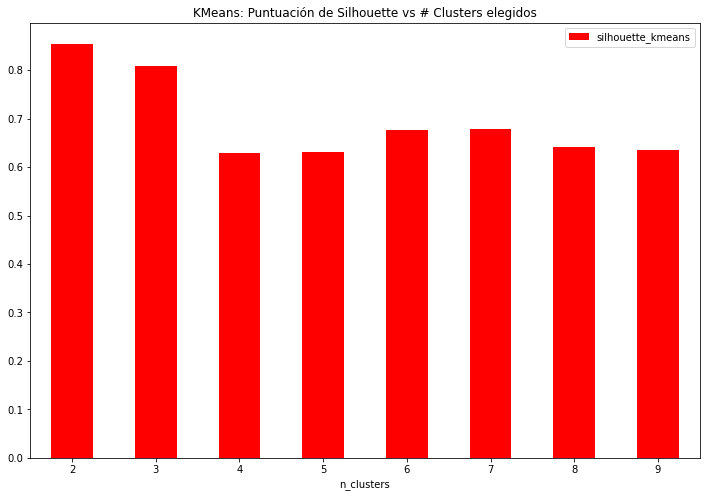

In [25]:
j=[i for i in range(2,10)]
pd.DataFrame({'n_clusters': j,
              'silhouette_kmeans': score
             }).set_index('n_clusters').plot(kind='bar',figsize=(12,8),color='red')
plt.title('KMeans: Puntuación de Silhouette vs # Clusters elegidos')
plt.xticks(rotation = 360)
plt.show()


<p style='color:purple'>Las puntuaciones resultantes confirman que dos es la mejor opción para el número de clusters y su puntuación es 0.8545.</p>

<h5 style='color:red'>Nota</h5> 
<p>Este último gráfico es mas explícito que el gráfico de <strong>codo</strong>, pues solo basta con mirar la barra 2 cuya puntuación es de 0.8545.</p>


## PCA

El análisis de componentes principales (PCA) es un popular método de reducción de la dimensionalidad que se utiliza para reducir la dimensión de conjuntos de datos muy grandes. Para ello, combina múltiples variables en nuevas variables denominadas componentes principales. Estos componentes suelen ser independientes entre sí y contienen información valiosa de las variables originales.

El PCA no proporciona una representación exacta de los datos originales, pero intenta conservar tanta información valiosa como sea posible. Esto significa que, la mayoría de las veces, produce un resultado lo suficientemente aproximado como para que podamos extraer conclusiones.

1. Escalar los datos utilizando el módulo RobustScaler de la biblioteca sklearn:

In [38]:
df_pca=df.copy()
df_pca[df_pca.columns]=RobustScaler().fit_transform(df_pca)
df_pca.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour
0,1.0,65.50,2.272727,3.0,1.0,1.0,0.0,0.5,-0.285714,0.400000,-0.142857
1,0.0,0.00,0.563636,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,2.142857
2,1.0,14.25,0.890909,1.0,1.0,0.0,0.0,0.5,-0.285714,0.333333,-0.142857
3,0.0,0.00,0.327273,0.0,0.0,0.0,0.0,0.5,-0.285714,0.333333,-0.714286
4,0.0,0.00,0.890909,0.0,0.0,0.0,0.0,0.5,-0.285714,0.133333,-0.571429


2. Aplicar PCA al conjunto de datos utilizando la clase PCA de la biblioteca sklearn:

In [41]:
pca = PCA(random_state = 42)
pcaData = pca.fit_transform(df_pca)
df_component = pd.DataFrame(pcaData, columns=["pc"+str(i+1) for i in range(len(df_pca.columns))])
df_component.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,55.240897,-4.749623,-1.974173,0.838988,0.276179,-0.362805,-0.514110,-0.488157,0.439010,0.201414,-0.338299
1,-10.173302,-0.109510,-0.193012,-0.213188,-0.021655,1.643914,-1.474273,-0.090832,0.395440,0.216442,0.273843
2,4.140069,-0.724603,0.153824,-0.107387,-0.274732,-0.511847,-0.746037,-0.172407,0.361463,0.122171,-0.594095
3,-10.172525,-0.129354,-0.214771,-0.483926,-0.138991,-1.051943,-0.551841,-0.080366,0.404190,0.320221,0.315334
4,-10.164355,-0.100717,-0.188388,0.079394,-0.139281,-0.935657,-0.629006,-0.081546,0.206275,0.301626,0.329053


3. Comprobar la varianza explicada para cada componente:

In [42]:
for i in range(0,len(pca.explained_variance_ratio_)):
    print("Componente ",i ,"",pca.explained_variance_ratio_[i].round(3))

Componente  0  0.926
Componente  1  0.053
Componente  2  0.011
Componente  3  0.006
Componente  4  0.002
Componente  5  0.001
Componente  6  0.001
Componente  7  0.0
Componente  8  0.0
Componente  9  0.0
Componente  10  0.0


4. Crear un gráfico para comprobar el número de componentes óptimos:

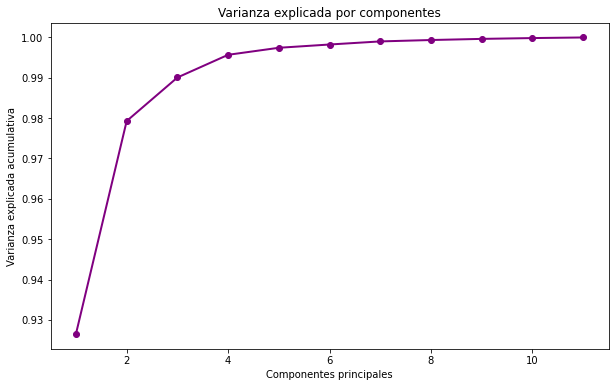

In [43]:
plt.figure(figsize= (10,6))
PC_values = np.arange(pca.n_components_) + 1
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(PC_values, cummulative_variance, 'o-', linewidth=2, color='purple')
plt.title('Varianza explicada por componentes')
plt.xlabel('Componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

Al inspeccionar el gráfico, normalmente se selecciona el número de componentes que dan una varianza explicada acumulada de al menos el 75%. En el diagrama de dispersión, se trata de entre seis y siete componentes.

In [44]:
df_reduced = df_component.loc[:,['pc1','pc2','pc3','pc4','pc5','pc6','pc7']]
df_reduced.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,55.240897,-4.749623,-1.974173,0.838988,0.276179,-0.362805,-0.514110
1,-10.173302,-0.109510,-0.193012,-0.213188,-0.021655,1.643914,-1.474273
2,4.140069,-0.724603,0.153824,-0.107387,-0.274732,-0.511847,-0.746037
3,-10.172525,-0.129354,-0.214771,-0.483926,-0.138991,-1.051943,-0.551841
4,-10.164355,-0.100717,-0.188388,0.079394,-0.139281,-0.935657,-0.629006


5. Combinamos **K-means** y **PCA**.

In [50]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit_predict(df_reduced)
labels=kmeans_pca.labels_
df_reduced['labels']=labels # crear nueva columna con etiquetas de agrupación

6. Crear DataFrame concatenando **df** y **df_reduced**.

In [46]:
df_kmeans_pca=pd.concat([df,df_reduced],axis=1)
df_kmeans_pca.head()

,status_type,num_shares,num_likes,num_wows,num_hahas,num_sads,num_angrys,year,month,day,hour,pc1,pc2,pc3,pc4,pc5,pc6,pc7,labels
0,3,262,432,3,1,1,0,2018,4,22,6,55.240897,-4.749623,-1.974173,0.838988,0.276179,-0.362805,-0.514110,1
1,1,0,150,0,0,0,0,2018,4,21,22,-10.173302,-0.109510,-0.193012,-0.213188,-0.021655,1.643914,-1.474273,0
2,3,57,204,1,1,0,0,2018,4,21,6,4.140069,-0.724603,0.153824,-0.107387,-0.274732,-0.511847,-0.746037,0
3,1,0,111,0,0,0,0,2018,4,21,2,-10.172525,-0.129354,-0.214771,-0.483926,-0.138991,-1.051943,-0.551841,0
4,1,0,204,0,0,0,0,2018,4,18,3,-10.164355,-0.100717,-0.188388,0.079394,-0.139281,-0.935657,-0.629006,0


7. Obtener puntuación de Kmeans-PCA

In [52]:
score_kmean_pca=silhouette_score(df_reduced, labels, metric='euclidean')
np.round(score_kmean_pca,4)

0.877

<a name='ref_2' style='text-decoration:none; color:purple'>La puntuación es de 0.877.<a/>

8. vizualizar nuestros datos con los dos primeros componentes principales.

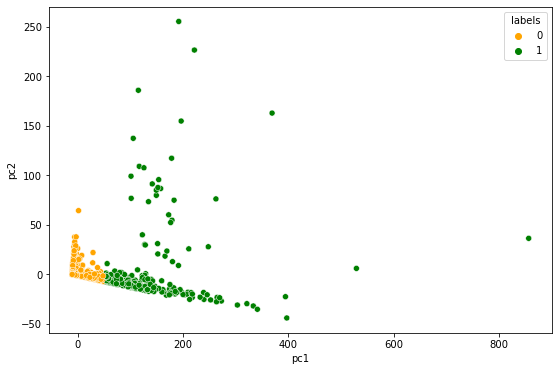

In [53]:
plt.figure(figsize= (9,6))
sns.scatterplot(data = df_kmeans_pca, x='pc1', y='pc2', hue = 'labels',palette=['orange','green']);


9. vizualizar nuestros datos con la columnas **num_wows** y **num_angrys**.

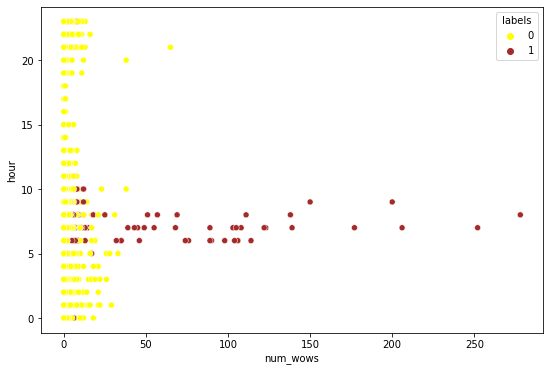

In [54]:
plt.figure(figsize= (9,6))
sns.scatterplot(data = df_kmeans_pca, y='hour', x='num_wows', hue = 'labels',palette=['yellow','brown']);


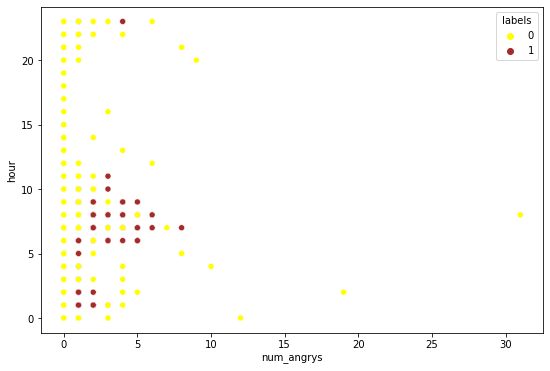

In [83]:
plt.figure(figsize= (9,6))
sns.scatterplot(data = df_kmeans_pca, y='hour', x='num_angrys', hue = 'labels',palette=['yellow','brown']);

Existen más interacciones entre las 5 y las 10.

## Conclusión
Podemos concluir que con la puntuación **Silhouette**, [kmeans-pca](#ref_2) es mejor pues tiene una puntuación de 0.877 frente al 0.8491 que tiene el [jerárquico](#ref_1).